# Figure 4: Volume comparison between M22 and F19

In [1]:
import os 
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely.geometry

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

cl = px.colors.qualitative.D3
os.chdir('/home/rooda/Dropbox/Patagonia/')

# Data

In [2]:
# Preprocessed RGI inventories (with already an ID and a Zone code)
RGI6 = gpd.read_file("GIS South/Glaciers/RGI6_v2.shp") # preprocessed in "Preprocess_RGI.R"
RGI7 = gpd.read_file("GIS South/Glaciers/RGI7_v2.shp") # preprocessed in "Preprocess_RGI.R"

# Zone: numeric to name (for the plot)
RGI6 = RGI6.replace({"Zone": {1:'PPY', 2:'PCA', 3:'NPI-E', 4:'NPI-W', 5:'SPI-N', 6:'SPI-C', 7:'SPI-S', 8:'GCN', 9:'CDI'}})
RGI7 = RGI7.replace({"Zone": {1:'PPY', 2:'PCA', 3:'NPI-E', 4:'NPI-W', 5:'SPI-N', 6:'SPI-C', 7:'SPI-S', 8:'GCN', 9:'CDI'}})

basins = gpd.read_file("GIS South/Basins_Patagonia_ice.shp")
basins = basins.set_index("ID")

## 1. Comparison by catchment (a,b)

In [3]:
data = RGI6[["ID_basin","vol_M22","vol_F19"]].groupby("ID_basin").sum()
basins = pd.concat([basins, data], axis=1)
basins # notice there are basins with glacier_area > 0, but the total volume is 0 because the volume assignment is based on the glacier's terminus position

,basin_area,lat,lon,Zone,RGI6_ngla,RGI6_area,RGI7_ngla,RGI7_area,RGI6_area_,Name,geometry,vol_M22,vol_F19
0,29.55,-49.916985,-73.741851,6.0,1.0,40.424054,1.0,37.491513,98.363791,NaN,"POLYGON ((-73.72645 -49.88884, -73.70706 -49.8...",6.488849,5.297352
1,31.41,-54.666561,-69.763669,9.0,1.0,34.894414,1.0,39.191853,99.279409,NaN,"POLYGON ((-69.74586 -54.63201, -69.74045 -54.6...",3.614492,3.309764
2,97.63,-50.603309,-73.370863,6.0,0.0,0.000000,9.0,155.599212,95.484854,NaN,"POLYGON ((-73.35703 -50.53665, -73.35212 -50.5...",NaN,NaN
3,26.74,-54.640225,-69.530664,9.0,1.0,27.672274,1.0,24.396267,100.000000,NaN,"POLYGON ((-69.51544 -54.59554, -69.50463 -54.5...",2.537286,3.053799
4,60.60,-49.842249,-73.759775,6.0,2.0,65.064631,1.0,60.009486,98.027613,NaN,"MULTIPOLYGON (((-73.81290 -49.82869, -73.81048...",8.755025,6.529922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,239.52,-48.588851,-73.768220,5.0,14.0,617.512028,50.0,635.027307,53.505515,NaN,"POLYGON ((-73.72996 -48.49458, -73.72054 -48.4...",314.583050,227.284141
2018,986.44,-46.690103,-73.644219,4.0,1.0,721.949949,13.0,684.966739,66.754946,NaN,"MULTIPOLYGON (((-74.06348 -46.59560, -74.06121...",282.901020,251.573580
2020,215.28,-45.870200,-73.378296,2.0,3.0,9.126361,9.0,9.995560,3.997858,NaN,"POLYGON ((-73.24036 -45.80388, -73.23812 -45.8...",0.568540,0.468213
2021,78.83,-49.166033,-74.016617,5.0,1.0,1234.714181,0.0,0.000000,36.329042,NaN,"POLYGON ((-74.07262 -49.10398, -74.06547 -49.1...",496.826840,448.169080


In [4]:
basins["vol_M22"] = basins["vol_M22"].fillna(0) # correct NaNs
basins["vol_F19"] = basins["vol_F19"].fillna(0)

In [5]:
basins = basins.reset_index()
basins = basins.rename(columns = {"index": "ID"})

names = ["Yelcho", "Baker", "Santa Cruz                          ", "Palena", "Grey", "Puelo", "Cisnes", "Aysen", "Pascua"]
basins.loc[basins.basin_area > 5000, "Name"] = names

In [21]:
len((basins.loc[((basins['vol_M22'] / basins['basin_area'])*1000)>= 1])) # The 26% of the total catchment area, which represents XX catchments

483

<Axes: >

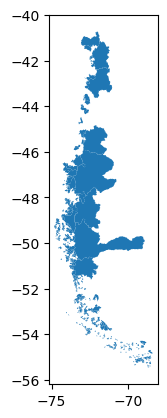

In [35]:
basins.loc[basins['vol_M22'] > basins['vol_F19']].plot()

In [6]:
data = RGI6[["Zone","vol_M22","vol_F19"]].groupby("Zone").sum()
data["delta_p"] = (data.vol_M22 / data.vol_F19) - 1
data["delta_abs"] = (data.vol_M22 - data.vol_F19).astype("int")
delta_abs  = [str(x)+' km<sup>3</sup>' for x in data["delta_abs"]]

In [ ]:
# basemap for background
geo_map = gpd.read_file("/home/rooda/Dropbox/ArcGIS/Chile/south_america.shp")
geo_map = geo_map[(geo_map.CC == "CI") | (geo_map.CC == "AR")]
geo_map = geo_map.dissolve(by='REGION')
geo_map["geometry"] = geo_map.simplify(0.01)

poly_gdf = shapely.geometry.Polygon([(-76, -55.7), (-76, -40.52), (-68.05, -40.52), (-68.05, -55.7), (-76, -55.8)])
poly_gdf = gpd.GeoDataFrame([1], geometry=[poly_gdf], crs=geo_map.crs)

geo_map = geo_map.clip(poly_gdf)

In [ ]:
# hydrological zone divides
geo_lines = gpd.read_file("GIS South/Basins_Patagonia_ice_divides.shp")

lats = []
lons = []

for feature in geo_lines.geometry:
    if isinstance(feature, shapely.geometry.linestring.LineString):
        linestrings = [feature]
    elif isinstance(feature, shapely.geometry.multilinestring.MultiLineString):
        linestrings = feature.geoms
    else:
        continue
    for linestring in linestrings:
        x, y = linestring.xy
        lats = np.append(lats, y)
        lons = np.append(lons, x)
        lats = np.append(lats, None)
        lons = np.append(lons, None)
        
lat_coords = [-43.2, -45.95,  -46.4,  -47.55,  -49.2,   -50.5,   -52.0, -53.1, -54.8]
lon_coords = [-71.2, -71.7,   -74.5,  -71.7,   -72.2,   -72.3,   -72.1, -72.8, -68.9]
names      = ["PPY", "PCA", "NPI-W", "NPI-E", "SPI-N", "SPI-C", "SPI-S", "GCN", "CDI"]
names  = ['<b>'+x+'</b>' for x in names]

In [ ]:
fig = make_subplots(rows=2, cols=3, column_titles = ["a) Normalized thickness in M22", "b) Volume difference per catchment rel. to F19 ", "c) Volume difference per zone rel. to F19 "], 
                    horizontal_spacing = 0.01, specs=[[{"type": "scattergeo", "rowspan": 2}, {"type": "scattergeo", "rowspan": 2}, {"type": "xy"}], 
                                                      [None,                                 None,                                  None]], 
                    row_heights = [2,-0.18])

## Basemap
for x in range(1,3):
    fig.add_trace(go.Choropleth(geojson = eval(geo_map['geometry'].to_json()),  locations = geo_map.index, z = geo_map['iso_num'], 
                            colorscale = ["#d5d5d5", "#d5d5d5"], showscale= False, marker_line_color ='white', marker_line_width=0.1), row=1, col=x)

# Figure a -------------------------------------------------------------------------------------------------------------------

colorbar_config_a = dict(title='Thickness', len=0.4, x=0.22, y= 0.79, ticksuffix = " m", thickness=20)
fig.add_trace(go.Choropleth(geojson = eval(basins['geometry'].to_json()),  locations = basins.index, z = (basins['vol_M22'] / basins['basin_area'])*1000, 
                            colorscale = ["#ccebc5", "#4eb3d3", "#034b8a"], marker_line_color ='rgba(255,255,255, 0.6)', marker_line_width=0.5, 
                            zmin = 0, zmax = 100, colorbar = colorbar_config_a), row=1, col=1)


# Figure b -------------------------------------------------------------------------------------------------------------------

colorbar_config_b = dict(title='Difference', len=0.4, x=0.57, y = 0.79, ticksuffix = "%", thickness=20)
fig.add_trace(go.Choropleth(geojson = eval(basins['geometry'].to_json()), locations = basins.index, z = ((basins['vol_M22']/basins['vol_F19'])-1)*100, 
                            colorscale=[cl[1], "#ffe9ba" ,cl[0]], marker_line_color='rgba(255,255,255, 0.6)', marker_line_width=0.5, 
                           zmax = 100, zmin = -100, colorbar = colorbar_config_b), row=1, col=2)
## for Fig a) and b)
for x in range(1,3):
    
    ## Add basin and hydrological zone names plus the hydro zone divides
    fig.add_trace(go.Scattergeo(lon = lons, lat = lats, mode = 'lines', line = dict(width = 0.7,color = 'black'),opacity = 0.5, showlegend = False),row=1, col=x)  
    fig.add_trace(go.Scattergeo(lon = lon_coords, lat=lat_coords, mode='text', text=names, textfont=dict(size=12, color = "rgba(0,0,0,0.5)"), showlegend = False),row=1, col=x)
    fig.add_scattergeo(geojson = eval(basins['geometry'].to_json()), locations = basins.index, text = basins['Name'], mode = 'text', showlegend = False,
                       textfont=dict(size=11, color = "rgba(0,0,0,0.3)"),row=1, col=x)

# Figure c -------------------------------------------------------------------------------------------------------------------
fig.add_trace(go.Bar(y=data.index, x=data['delta_p'], orientation='h', text= delta_abs,
                     marker= dict(color = data['delta_p'], colorscale = ["#ffb05d", "#ffe9ba", "#8eafb6"], showscale=False)), row=1, col=3)
fig.update_traces(showlegend=False, opacity=1, textfont_size=14, textangle=0, textposition="outside", cliponaxis=False, row=1, col=3)
fig.update_xaxes(title = "Difference per zone (%)", title_standoff = 0, zeroline = True, range = [-0.19,0.19], dtick = 0.1, tickformat = ',.0%', row=1, col=3)
fig.update_yaxes(side = "right", categoryorder='array', categoryarray= ['CDI', 'GCN', 'SPI-S', 'SPI-C', 'SPI-N', 'NPI-W','NPI-E','PCA','PPY'], row=1, col=3)
fig.update_traces(textposition='auto', row=1, col=3)
fig.add_annotation(text="Absolute difference", font=dict(size=14), x=-0.13, y=0.25, ax=30, showarrow=True, row=1, col=3)

# Layout -------------------------------------------------------------------------------------------------------------------
fig.update_xaxes(showline = True, linecolor = 'rgba(0,0,0,0.5)', linewidth = 1, ticks="outside", griddash = "dot", mirror=True)
fig.update_yaxes(showline = True, linecolor = 'rgba(0,0,0,0.5)', linewidth = 1, ticks="outside", griddash = "dot", mirror=True)

fig.update_geos(showframe = True, framewidth = 1, framecolor = "rgba(0,0,0,0.5)", lonaxis_range=[-76, -68], lataxis_range=[-55.8, -40.5], 
                bgcolor = "#f9f9f9", showland = False, showcoastlines = False, showlakes = False)

fig.update_layout(autosize = False, width = 1150, height = 700, plot_bgcolor="rgba(213,213,213,0.6)", margin = dict(l=10, r=5, b=5, t=30))

fig.write_image("/home/rooda/Dropbox/Patagonia/MS2 Results/Figure_4_thickness.png", scale=4)
fig.show()